<a href="https://colab.research.google.com/github/anithathavamani/ML-dataset/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("/content/bank.csv")

In [20]:
data.shape

(515, 6)

In [21]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [23]:
data.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


In [25]:
# drop the column 'Bank' using drop()
# 'axis = 1' drops the specified column
data = data.drop('Bank',axis=1)
# consider the numeric variables
data = data.drop(['DD'], axis = 1)


In [28]:
data.head()

,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,147,111,2460,639
1,86,65,3510,436
2,149,76,2570,669
3,112,129,3650,623
4,135,128,3400,579


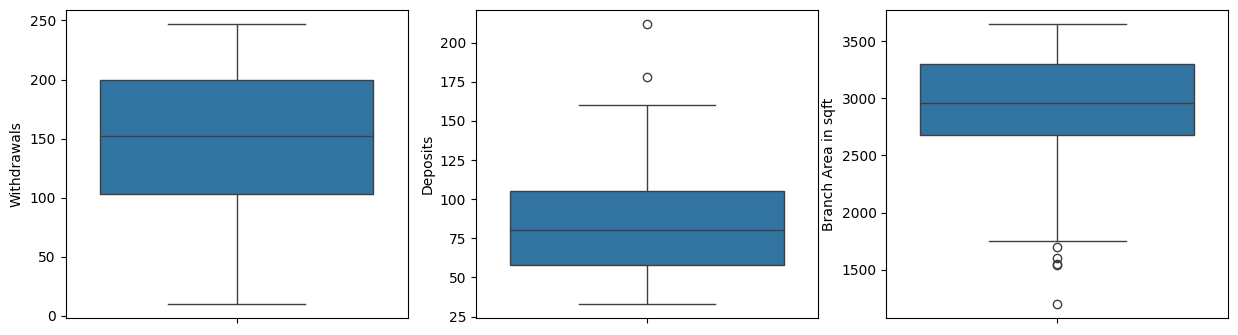

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(data.columns, ax.flatten()):

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(data[variable], ax = subplot)

# display the plot
plt.show()

In [42]:
# consider the observations with withdrawals less than 130000
data = data[data['Withdrawals'] < 160]

In [32]:
data.shape

(515, 4)

In [34]:
# consider the features 'Cust_Spend_Score' and 'Yearly_Income'
X_filtered = data[['Deposits', 'Withdrawals']]

# print top 5 observations of X
X_filtered.head()

,Deposits,Withdrawals
0,111,147
1,65,86
2,76,149
3,129,112
4,128,135


In [35]:
from sklearn.preprocessing import StandardScaler

# initialize the StandardScaler
X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(X_filtered)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Deposits,Withdrawals
0,1.026024,-0.064973
1,-0.584105,-1.138113
2,-0.199074,-0.029788
3,1.656075,-0.680709
4,1.621072,-0.276082


In [36]:
# import various functions from sklearn
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [37]:
wcss

[1029.9999999999998,
 634.9109584783187,
 412.20576623804084,
 284.8085823945563,
 238.77595304877343,
 200.3910639161444,
 166.90558543947103,
 143.71455454518096,
 126.02782155102399,
 110.94140587001765,
 102.00723984550116,
 92.68078776226733,
 87.96240902533307,
 78.93058619876106,
 73.91724602606448,
 69.20118828079369,
 65.59635894343629,
 60.767690262967406,
 57.47556987311597,
 54.5188670732947]

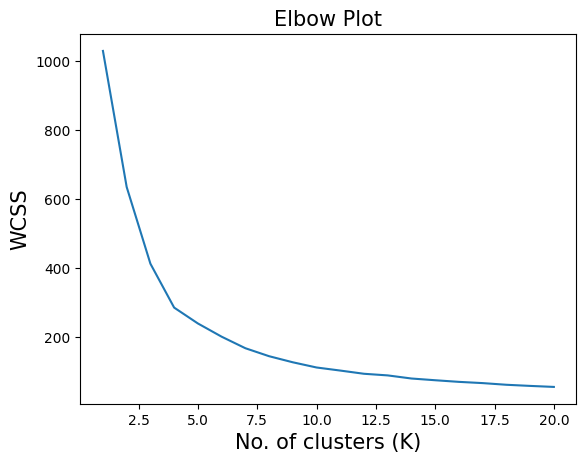

In [38]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [39]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6,7,8,9]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters the silhouette score is 0.3598074088738418)
For 3 clusters the silhouette score is 0.3797063335764633)
For 4 clusters the silhouette score is 0.38427121073881665)
For 5 clusters the silhouette score is 0.3680664996120414)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters the silhouette score is 0.3726199079796633)
For 7 clusters the silhouette score is 0.3731785323215232)
For 8 clusters the silhouette score is 0.3796206166344123)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters the silhouette score is 0.38306342635541096)
